# Predicting Survival in the Titanic Data Set


We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

### 1) Import Necessary Libraries

First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.


In [569]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

### 2) Read in and Explore the Data

It's time to read in our training and testing data using pd.read_csv, and take a first look at the training data using the describe() function.


In [570]:
data = pd.read_csv("titanic-train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [571]:
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stoytcheff, Mr. Ilia",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3) Cleaning Data

In [572]:
#check for any other unusable values
data.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Some Observations:

* There are a total of 891 passengers in our training set.
* The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.



In [573]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')
imputer.fit(data.loc[:,['Age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [524]:
data.loc[:,['Age']] = imputer.fit_transform(data[['Age']])

In [525]:
data.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Feature we are consider as for the give requiremnt

In [526]:
features = data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']]
features

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [527]:
features.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000


In [528]:
features['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [529]:
features['Sex'].replace(['male','female'],[0,1],inplace=True)

In [530]:
labels = data.loc[:,'Survived']
labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Some Predictions:

* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.



# 4) Data Visualization

It's time to visualize our data so we can see whether our predictions were accurate!






Sex Feature


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


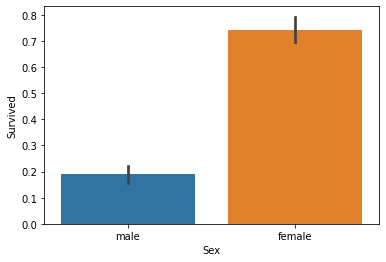

In [532]:
sns.barplot(x="Sex", y="Survived", data=data)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

### Pclass Feature


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


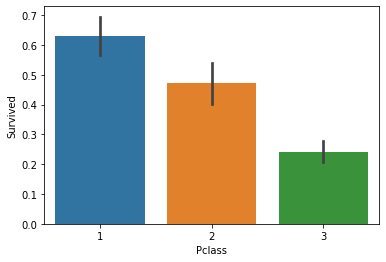

In [533]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=data)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

### SibSp Feature


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


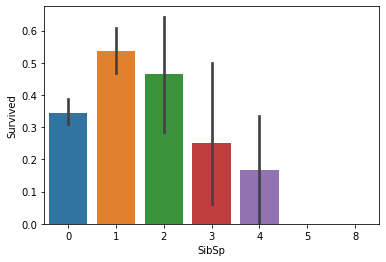

In [534]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=data)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", data["Survived"][data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", data["Survived"][data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

### Parch Feature


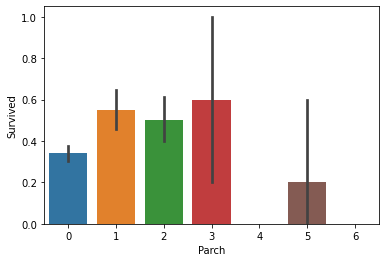

In [574]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=data)
plt.show()



People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.


### Age Feature


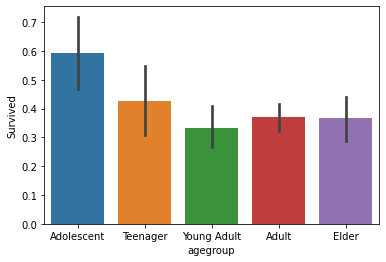

In [536]:
agesplit = [0,10,18,25,40,90]
agestatus = ['Adolescent','Teenager','Young Adult','Adult','Elder']

data['agegroup']=pd.cut(data.Age,agesplit,labels=agestatus)
sns.barplot(x="agegroup", y="Survived", data=data)
plt.show()

([<matplotlib.patches.Wedge at 0x2159b888688>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

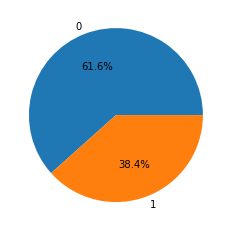

In [538]:
plt.pie(data.Survived.value_counts(), labels=data.Survived.unique(), autopct='%1.1f%%')

In [539]:
features.describe(include="all")

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=features, width= 0.5,ax=ax,  fliersize=3)

### Choosing the Decision Tree Model

#### Splitting the Training Data

We will use part of our training data (30% in this case) to test the accuracy of our different models.


In [541]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.30, random_state= 400)

In [542]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [543]:
feature_name=list(features.columns)
class_name = list(y_train.unique())

In [544]:
clf.score(x_train,y_train)

0.9823434991974318

In [545]:
py_pred = clf.predict(x_test)

In [546]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7985074626865671

#### Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

we do hyperparameter tuning, we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy. Let's go ahead and try to improve our model.


We will start with scaling our data.

In [547]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(features)

In [548]:
X_scaled

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]])

### Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

In [552]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,labels,test_size = 0.30, random_state= 500)

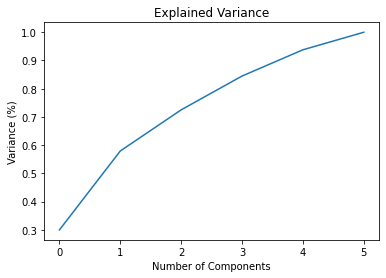

In [553]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [554]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [555]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,-0.926296,-0.895259,0.557193,0.347665,-0.373523,0.116365
1,1.497933,1.339850,-0.728178,-0.011950,-1.017527,-0.352668
2,-0.449617,-0.505489,-1.599096,-0.078296,-0.319100,0.411057
3,1.302467,1.103392,-0.826647,0.032045,-1.019646,-0.638295
4,-1.310593,0.038177,0.295140,-0.280385,0.122964,0.425768
...,...,...,...,...,...,...
886,-0.771675,0.391841,0.292556,0.472903,0.159551,-0.489017
887,0.737753,0.658127,-1.468480,0.976265,-0.305902,-1.113185
888,1.253125,-1.490482,-0.818409,-1.298678,0.759363,0.226881
889,-0.118524,1.115808,0.405303,0.894113,0.153530,-1.132737


In [575]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,labels,test_size = 0.30, random_state= 255)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7126865671641791

Let's now try to tune some hyperparameters using the GridSearchCV algorithm. We have studied about CrossValidation in upcoming lecture.

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.


In [557]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [558]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [559]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [560]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


In [561]:
grid_search.best_score_

0.8411354838709677

In [577]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, min_samples_leaf= 7, min_samples_split= 2, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [563]:
clf.score(x_test,y_test)

0.8022388059701493

In [564]:
# let's save the model
import pickle

with open('C:/Users/AbhilashMandadhi/Desktop/Ineuron/Assignments'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('C:/Users/AbhilashMandadhi/Desktop/Ineuron/Assignments'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('C:/Users/AbhilashMandadhi/Desktop/Ineuron/Assignments'+ '/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)